In [4]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
import os

In [5]:
# Data Loading
# Get the current directory of the script
current_dir = os.getcwd()

# Navigate to the data folder from the script folder
data_folder = os.path.join(current_dir, '../data')

# Load the data from the CSV file
df = pd.read_csv(os.path.join(data_folder, 'benin-malanville.csv'))

In [6]:
# Checking Data structure
# Display the first few rows of the DataFrame
print(df.head())

# Get an overview of the DataFrame structure
print(df.info())

          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1  2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2  2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3  2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4  2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.1  122.1      0.0  998         0            0.0   26.3   26.2   
1      0.0    0.0      0.0  998         0            0.0   26.3   26.2   
2      0.5  124.6      1.5  997         0            0.0   26.4   26.2   
3      0.4  120.3      1.3  997         0            0.0   26.4   26.3   
4      0.3  113.2      1.0  997         0            0.0   26.4   26.3   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  
<class 'pandas.core.

In [7]:
# Summary Statics
# Calculate summary statistics for numeric columns
print(df.describe())

                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.000000   
25%         0.000000      24.2000

In [9]:
print("Column names and data types:")
print(df.dtypes)

Column names and data types:
Timestamp         object
GHI              float64
DNI              float64
DHI              float64
ModA             float64
ModB             float64
Tamb             float64
RH               float64
WS               float64
WSgust           float64
WSstdev          float64
WD               float64
WDstdev          float64
BP                 int64
Cleaning           int64
Precipitation    float64
TModA            float64
TModB            float64
Comments         float64
dtype: object


In [11]:
# Data Cleaning
# Check for missing values
print(df.isnull().sum())

# Handle missing values (e.g., imputation or removal)
df.dropna(inplace=True)  # Example: remove rows with missing values

z_scores = stats.zscore(df[['GHI', 'DNI', 'DHI']])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)  # Keeping entries where all z-scores are less than 3
df = df[filtered_entries]

# Removing Duplicates
df.drop_duplicates(inplace=True)

# Correcting Incorrect Entries (example: replacing negative values with NaN)
df[df < 0] = np.nan

Timestamp        0.0
GHI              0.0
DNI              0.0
DHI              0.0
ModA             0.0
ModB             0.0
Tamb             0.0
RH               0.0
WS               0.0
WSgust           0.0
WSstdev          0.0
WD               0.0
WDstdev          0.0
BP               0.0
Cleaning         0.0
Precipitation    0.0
TModA            0.0
TModB            0.0
Comments         0.0
dtype: float64


In [10]:

print("\nData Quality Check:")
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:",missing_values)


# Check for outliers or incorrect entries
# You can define thresholds or criteria based on domain knowledge
# For example, for columns GHI, DNI, and DHI, you may want to check for negative values
outliers_GHI = df[df['GHI'] < 0]
outliers_DNI =  df[df['DNI'] < 0]
outliers_DHI =  df[df['DHI'] < 0]

if not outliers_GHI.empty:
    print("Outliers in GHI column:")
    print(outliers_GHI)
else:
    print("No outliers found in GHI column")

if not outliers_DNI.empty:
    print("\nOutliers in DNI column:")
    print(outliers_DNI)
else:
    print("No outliers found in DNI column")

if not outliers_DHI.empty:
    print("\nOutliers in DHI column:")
    print(outliers_DHI)
else:
    print("No outliers found in DHI column")


Data Quality Check:
Missing Values: Timestamp        0.0
GHI              0.0
DNI              0.0
DHI              0.0
ModA             0.0
ModB             0.0
Tamb             0.0
RH               0.0
WS               0.0
WSgust           0.0
WSstdev          0.0
WD               0.0
WDstdev          0.0
BP               0.0
Cleaning         0.0
Precipitation    0.0
TModA            0.0
TModB            0.0
Comments         0.0
dtype: float64
No outliers found in GHI column
No outliers found in DNI column
No outliers found in DHI column


In [12]:
missing_comments = df['Comments'].isnull().all()

# Step 2: Handle Missing Values

    # Since the 'Comments' column appears entirely null, you might decide to drop it
df.drop(columns=['Comments'], inplace=True)
print("The 'Comments' column was entirely null and has been dropped.")

The 'Comments' column was entirely null and has been dropped.


In [14]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Timestamp      0 non-null      object 
 1   GHI            0 non-null      float64
 2   DNI            0 non-null      float64
 3   DHI            0 non-null      float64
 4   ModA           0 non-null      float64
 5   ModB           0 non-null      float64
 6   Tamb           0 non-null      float64
 7   RH             0 non-null      float64
 8   WS             0 non-null      float64
 9   WSgust         0 non-null      float64
 10  WSstdev        0 non-null      float64
 11  WD             0 non-null      float64
 12  WDstdev        0 non-null      float64
 13  BP             0 non-null      int64  
 14  Cleaning       0 non-null      int64  
 15  Precipitation  0 non-null      float64
 16  TModA          0 non-null      float64
 17  TModB          0 non-null      float64
dtypes: float64(15), int64(

Timestamp        0.0
GHI              0.0
DNI              0.0
DHI              0.0
ModA             0.0
ModB             0.0
Tamb             0.0
RH               0.0
WS               0.0
WSgust           0.0
WSstdev          0.0
WD               0.0
WDstdev          0.0
BP               0.0
Cleaning         0.0
Precipitation    0.0
TModA            0.0
TModB            0.0
dtype: float64

<Axes: xlabel='Timestamp'>

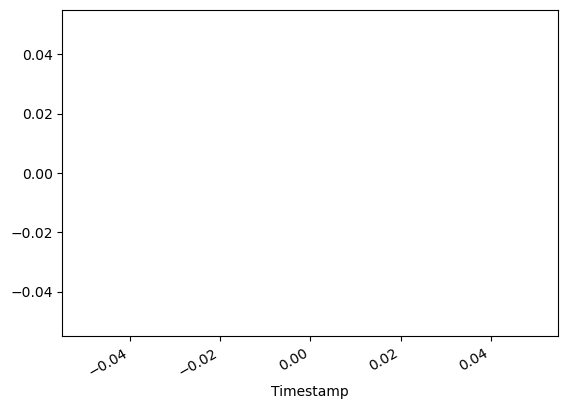

In [15]:
# Time Series Analysis
# Convert the Timestamp column to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Set Timestamp as the index
df.set_index('Timestamp', inplace=True)

# Plot time series data for relevant variables
df['GHI'].plot()

c:\Users\akili\anaconda3\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\akili\anaconda3\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


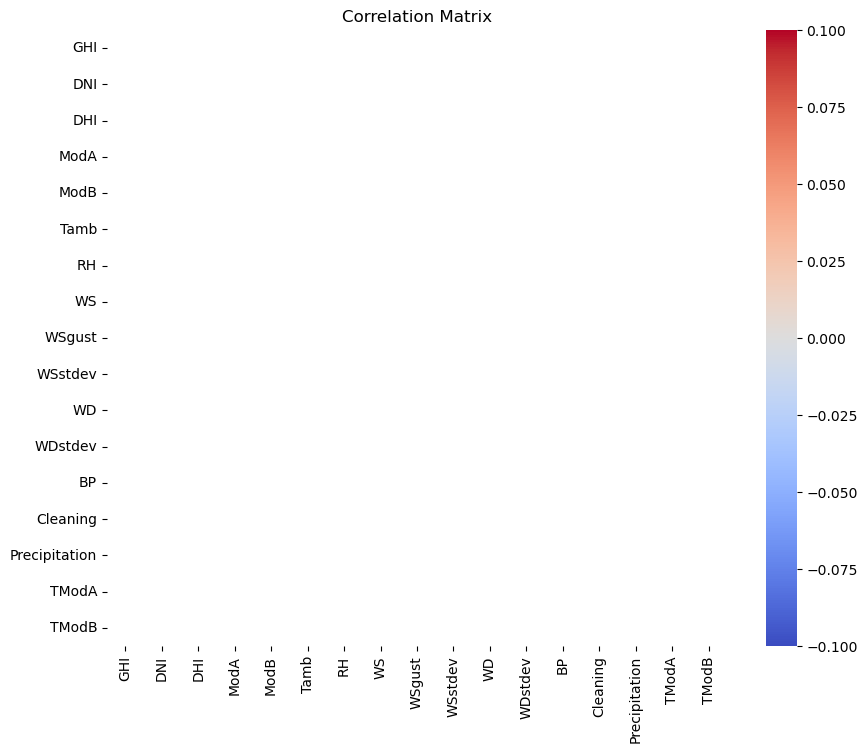

In [16]:
# Correlation Analysis
# Calculate correlation matrix
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

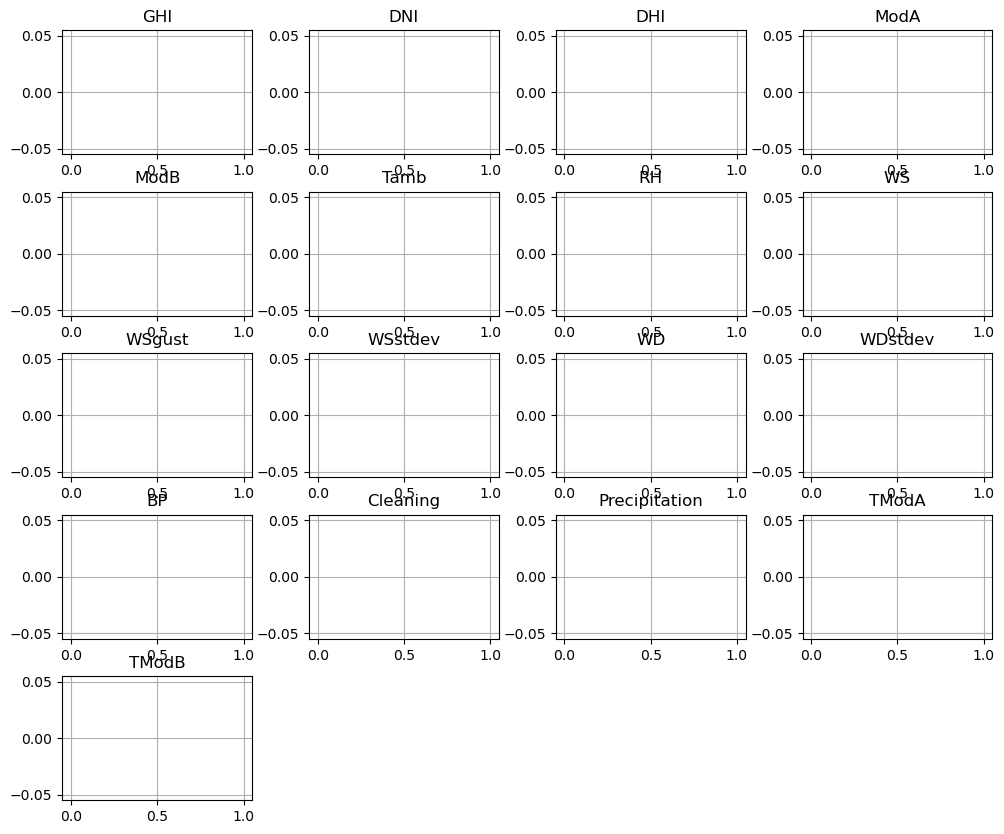

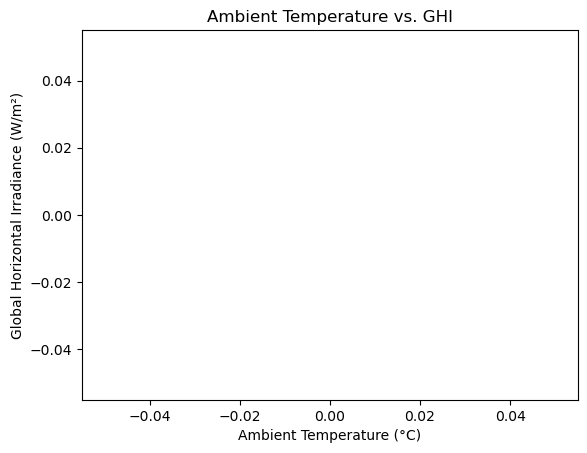

In [17]:
# Visualization
# Plot histograms for numeric variables
df.hist(figsize=(12, 10))
plt.show()

# Visualize relationships between variables using scatter plots
plt.scatter(df['Tamb'], df['GHI'])
plt.xlabel('Ambient Temperature (°C)')
plt.ylabel('Global Horizontal Irradiance (W/m²)')
plt.title('Ambient Temperature vs. GHI')
plt.show()

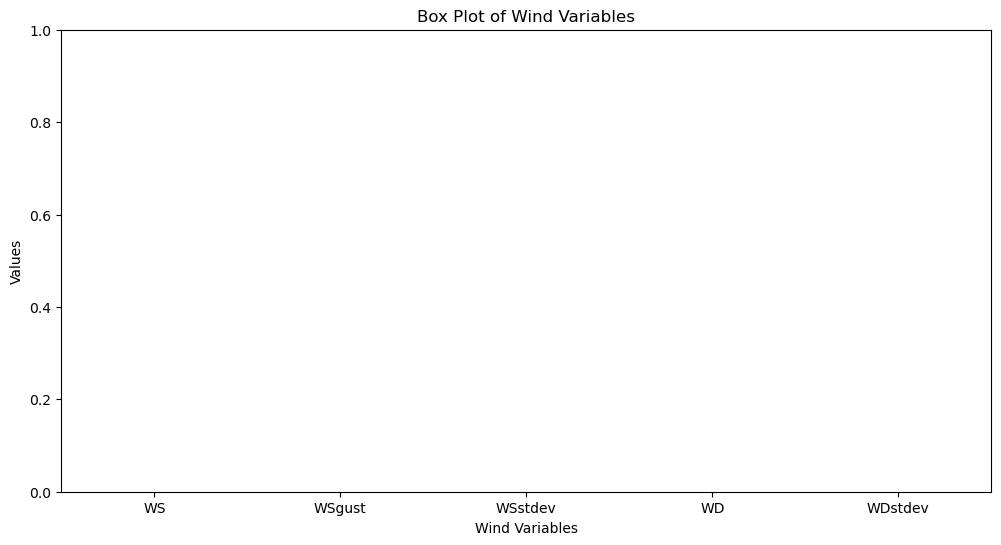

In [18]:
# Wind Analysis
wind_data = df[['WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev']]
# Box Plot of Wind Variables
plt.figure(figsize=(12, 6))
sns.boxplot(data=wind_data)
plt.title('Box Plot of Wind Variables')
plt.xlabel('Wind Variables')
plt.ylabel('Values')
plt.show()

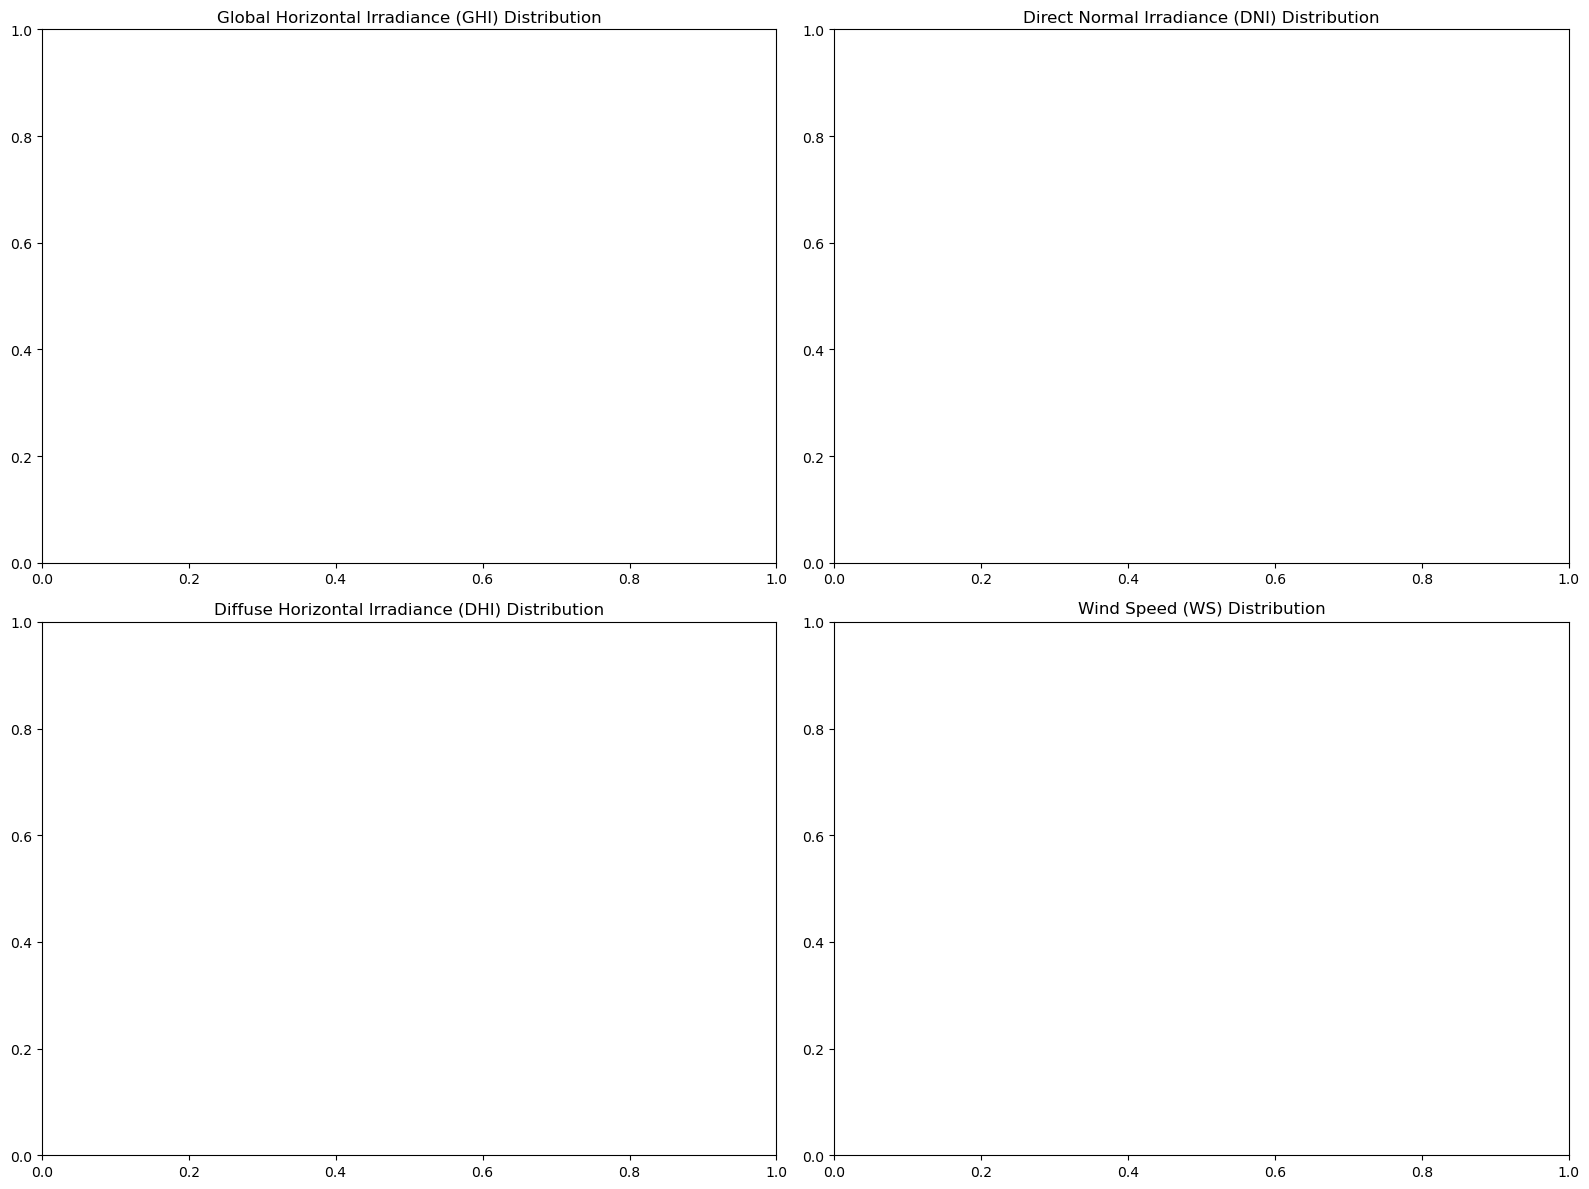

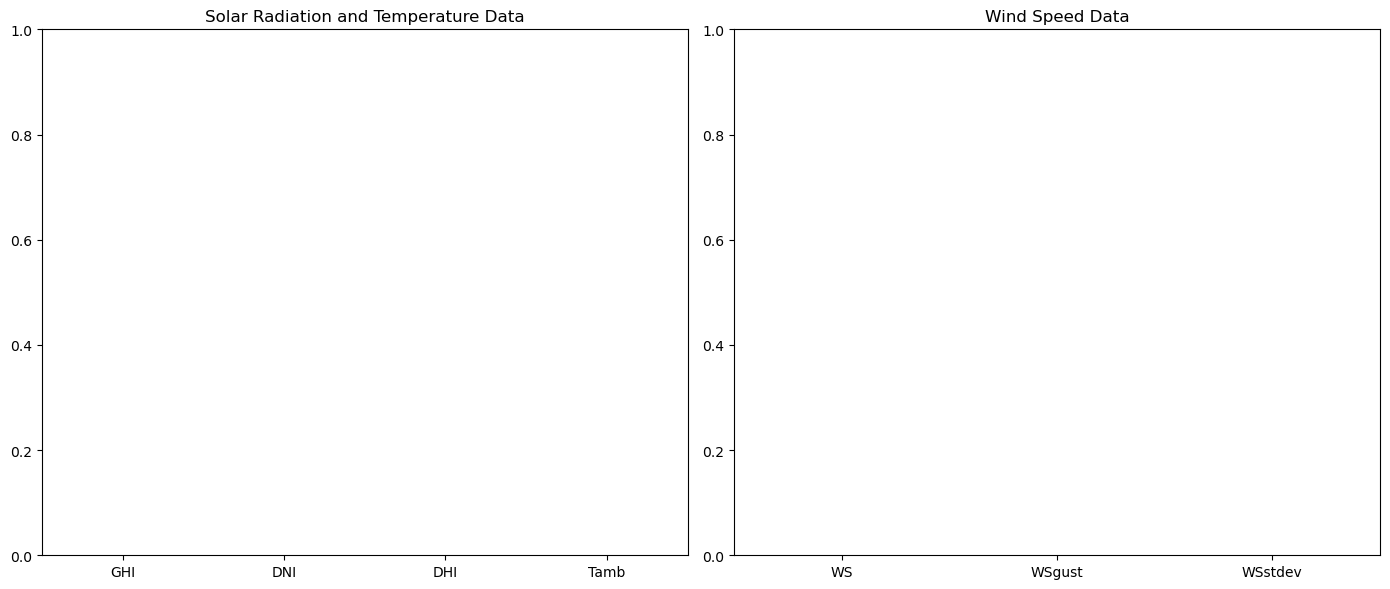

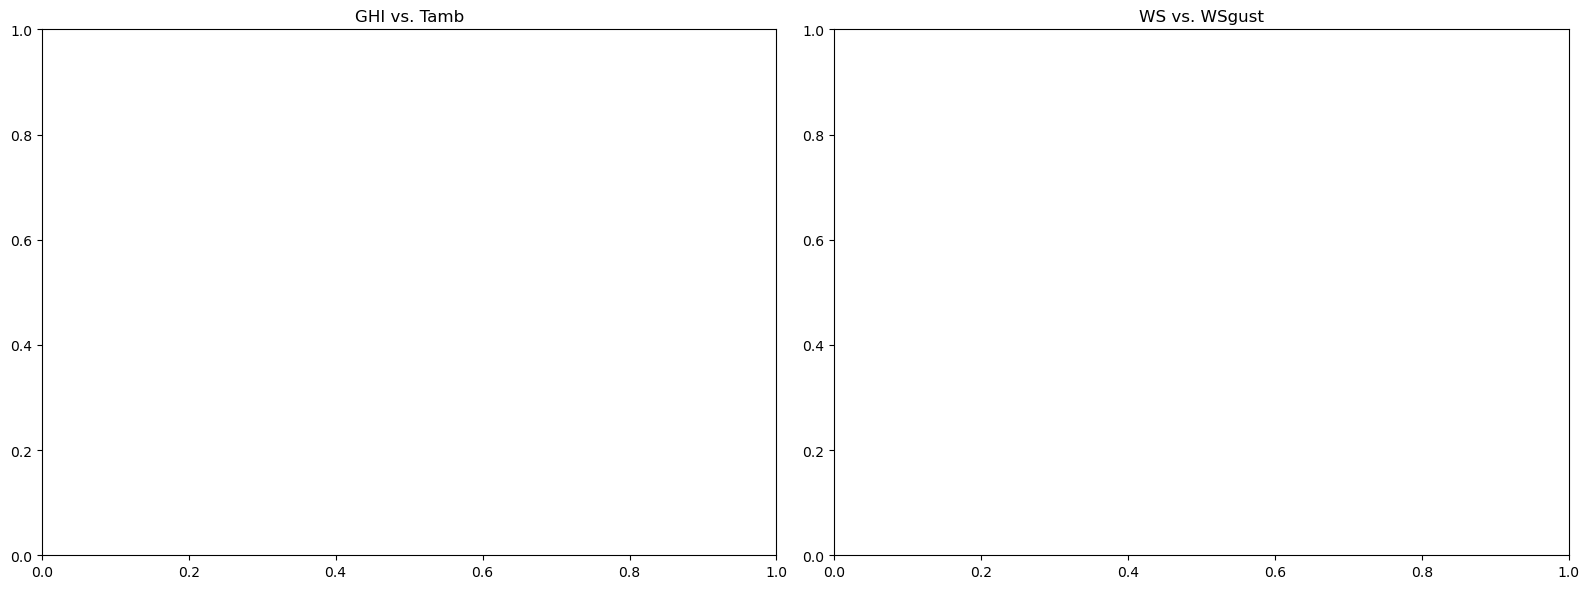

In [25]:

plt.figure(figsize=(16, 12))


plt.subplot(2, 2, 1)
sns.histplot(df['GHI'], kde=True, color='skyblue')
plt.title('Global Horizontal Irradiance (GHI) Distribution')

plt.subplot(2, 2, 2)
sns.histplot(df['DNI'], kde=True, color='salmon')
plt.title('Direct Normal Irradiance (DNI) Distribution')

plt.subplot(2, 2, 3)
sns.histplot(df['DHI'], kde=True, color='green')
plt.title('Diffuse Horizontal Irradiance (DHI) Distribution')

plt.subplot(2, 2, 4)
sns.histplot(df['WS'], kde=True, color='purple')
plt.title('Wind Speed (WS) Distribution')

plt.tight_layout()
plt.show()


plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=df[['GHI', 'DNI', 'DHI', 'Tamb']], orient='v')
plt.title('Solar Radiation and Temperature Data')

plt.subplot(1, 2, 2)
sns.boxplot(data=df[['WS', 'WSgust', 'WSstdev']], orient='v')
plt.title('Wind Speed Data')

plt.tight_layout()
plt.show()


plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='GHI', y='Tamb', data=df, color='skyblue')
plt.title('GHI vs. Tamb')

plt.subplot(1, 2, 2)
sns.scatterplot(x='WS', y='WSgust', data=df, color='salmon')
plt.title('WS vs. WSgust')

plt.tight_layout()
plt.show()

c:\Users\akili\anaconda3\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\akili\anaconda3\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


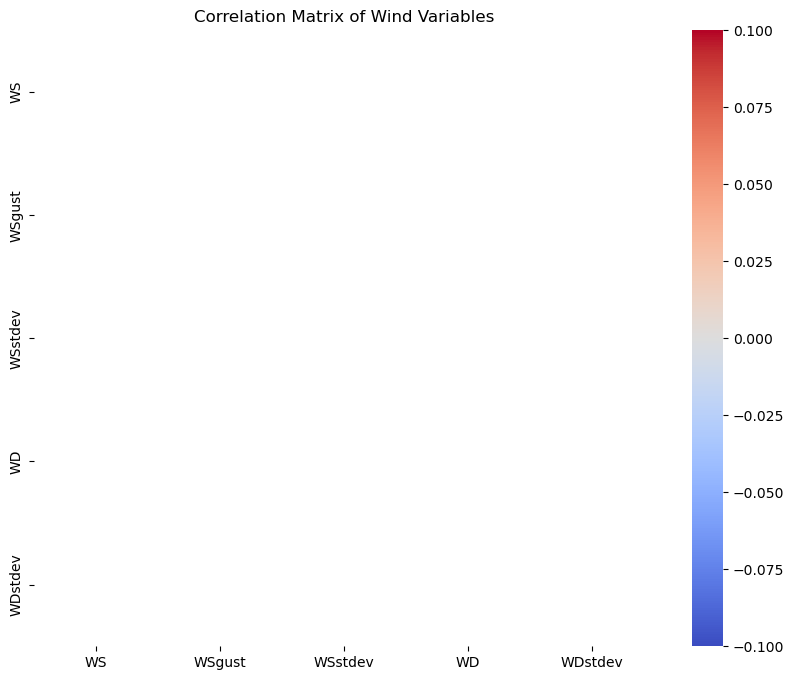

In [19]:
# Correlation Matrix of Wind Variables
wind_correlation_matrix = wind_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(wind_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Wind Variables')
plt.show()

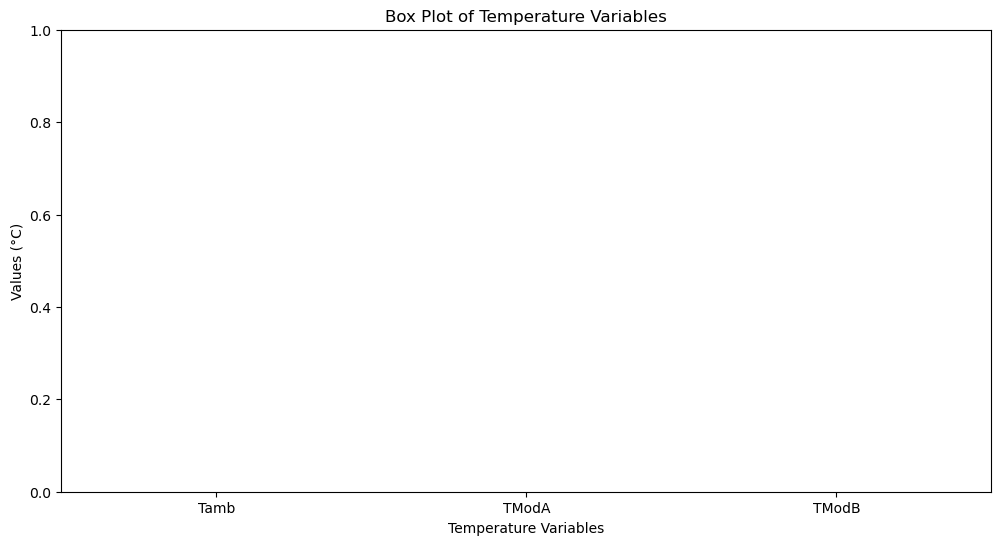

In [20]:
# Temperature Analysis
temperature_data = df[['Tamb', 'TModA', 'TModB']]
# Box Plot of Temperature Variables
plt.figure(figsize=(12, 6))
sns.boxplot(data=temperature_data)
plt.title('Box Plot of Temperature Variables')
plt.xlabel('Temperature Variables')
plt.ylabel('Values (°C)')
plt.show()

c:\Users\akili\anaconda3\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\akili\anaconda3\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


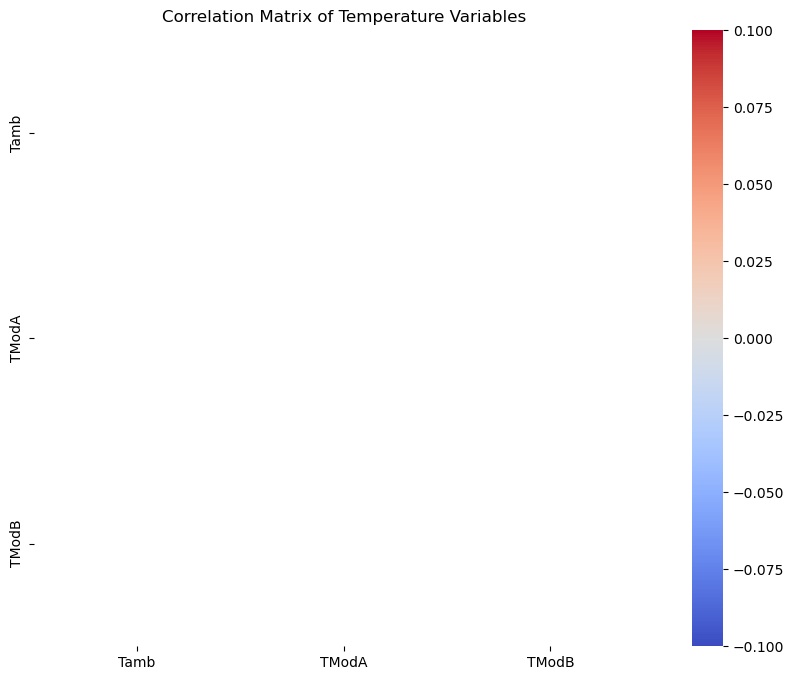

In [21]:
# Correlation Matrix of Temperature Variables
temperature_correlation_matrix = temperature_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(temperature_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Temperature Variables')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


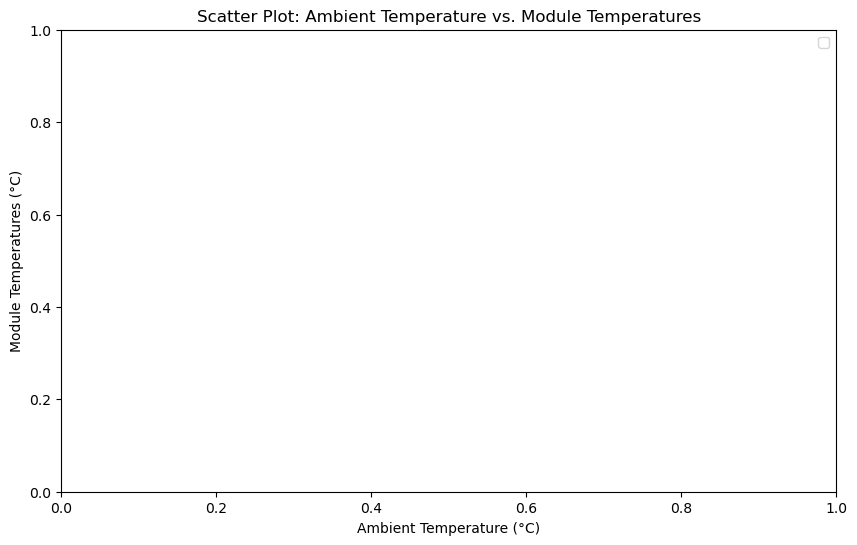

In [22]:
# Scatter Plot: Ambient Temperature vs. Module Temperatures
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Tamb', y='TModA', label='Module A Temperature')
sns.scatterplot(data=df, x='Tamb', y='TModB', label='Module B Temperature')
plt.xlabel('Ambient Temperature (°C)')
plt.ylabel('Module Temperatures (°C)')
plt.title('Scatter Plot: Ambient Temperature vs. Module Temperatures')
plt.legend()
plt.show()

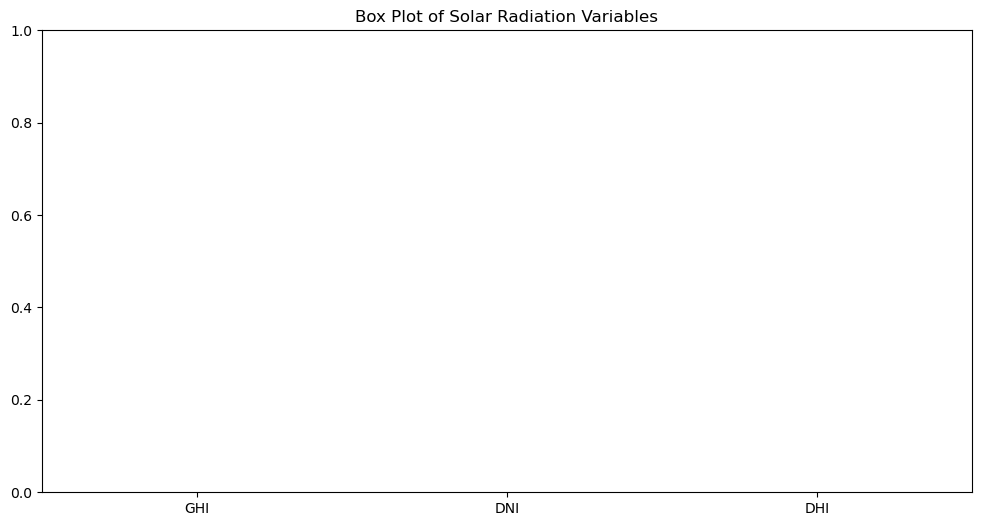

In [23]:
# Box Plot of Solar Radiation Variables
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['GHI', 'DNI', 'DHI']])
plt.title('Box Plot of Solar Radiation Variables')
plt.show()

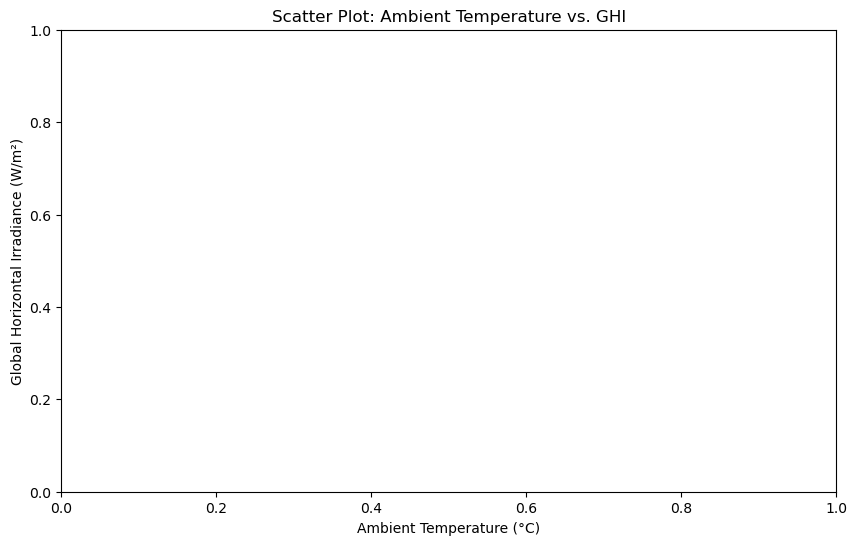

In [24]:
# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Tamb', y='GHI')
plt.xlabel('Ambient Temperature (°C)')
plt.ylabel('Global Horizontal Irradiance (W/m²)')
plt.title('Scatter Plot: Ambient Temperature vs. GHI')
plt.show()